In [402]:
import pandas as pd
import seaborn as sns

In [403]:
system12 = [12, [10, 12, 14, 16, 18, 21, 24, 28, 33, 39, 45, 51], [34]]
system11 = [11, [11, 13, 15, 18, 21, 24, 28, 33, 39, 45, 51], [34]]
system9 = [9, [12, 14, 16, 18, 21, 24, 26, 32, 36], [22, 30, 40]]
systems = [system9, system11, system12]

In [404]:
wheel_l = 0.002288
cadence_l = [90]

In [405]:
df = pd.DataFrame({
    "rear": [],
    "front": [],
    "g_ratio": [],
    "speed": [],
    "cadence": [],
    "system_n": []})

In [406]:
def ratio_calc():
    for c in cadence_l:
        cadence = c
        for s in systems:
            system_n = s[0]
            rear = s[1]
            front = s[2]
            for f in front:
                front_t = int(f)
                for r in rear:
                    rear_t = int(r)
                    g_ratio = front_t / rear_t
                    speed = wheel_l * cadence * 60 * g_ratio
                    df.loc[len(df)] = [rear_t, front_t, g_ratio, speed, cadence, system_n]

In [407]:
ratio_calc()

In [408]:
df

,rear,front,g_ratio,speed,cadence,system_n
0,12.0,22.0,1.833333,22.651200,90.0,9.0
1,14.0,22.0,1.571429,19.415314,90.0,9.0
2,16.0,22.0,1.375000,16.988400,90.0,9.0
3,18.0,22.0,1.222222,15.100800,90.0,9.0
4,21.0,22.0,1.047619,12.943543,90.0,9.0
5,24.0,22.0,0.916667,11.325600,90.0,9.0
6,26.0,22.0,0.846154,10.454400,90.0,9.0
7,32.0,22.0,0.687500,8.494200,90.0,9.0
8,36.0,22.0,0.611111,7.550400,90.0,9.0
9,12.0,30.0,2.500000,30.888000,90.0,9.0


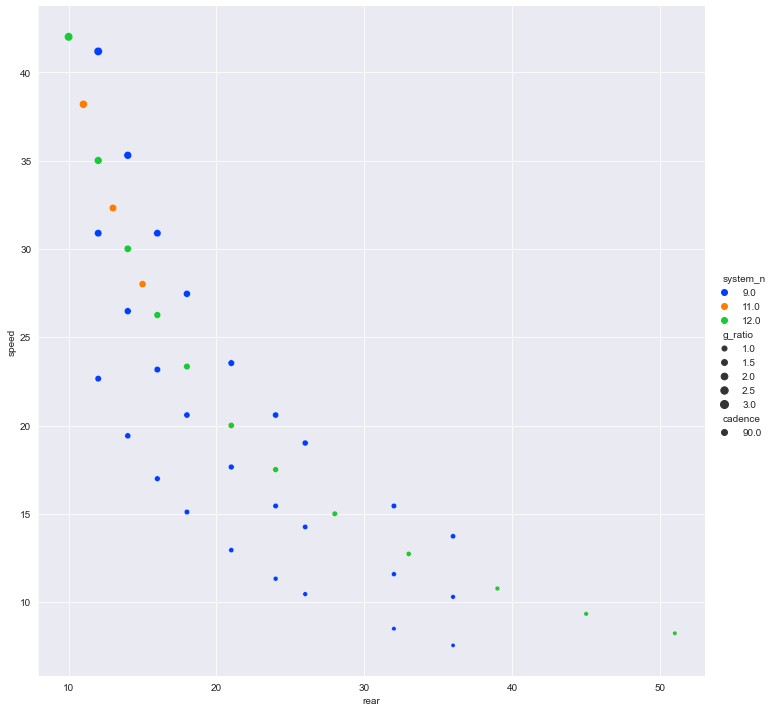

In [409]:
sns.relplot(
    data=df,
    x="rear", y="speed", hue="system_n", size="g_ratio", palette="bright", height=10, style="cadence"
)

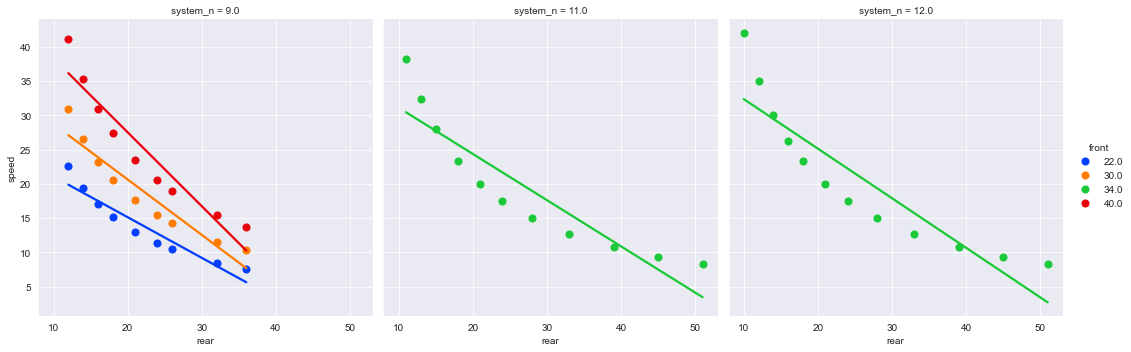

In [410]:
sns.lmplot(
    data=df,
    x="rear", y="speed", hue="front", col="system_n",
    col_wrap=3, ci=None, palette="bright", height=5,
    scatter_kws={"s": 50, "alpha": 1}
)